{0: 0, 1: 1.0, 2: 4.0, 3: 10.0, 4: 20.0, 5: 35.0, 6: 56.0, 7: 84.0, 8: 120.0, 9: 165.0, 10: 220.0, 11: 286.0, 12: 364.0, 13: 455.0, 14: 560.0, 15: 680.0, 16: 816.0, 17: 969.0, 18: 1140.0, 19: 1330.0, 20: 1540.0, 21: 1771.0, 22: 2024.0, 23: 2300.0, 24: 2600.0, 25: 2925.0, 26: 3276.0, 27: 3654.0, 28: 4060.0, 29: 4495.0, 30: 4960.0, 31: 5456.0, 32: 5984.0, 33: 6545.0, 34: 7140.0, 35: 7770.0, 36: 8436.0, 37: 9139.0, 38: 9880.0, 39: 10660.0, 40: 11480.0, 41: 12341.0, 42: 13244.0, 43: 14190.0, 44: 15180.0, 45: 16215.0, 46: 17296.0, 47: 18424.0, 48: 19600.0, 49: 20825.0, 50: 22100.0, 51: 23426.0, 52: 24804.0, 53: 26235.0, 54: 27720.0, 55: 29260.0, 56: 30856.0, 57: 32509.0, 58: 34220.0, 59: 35990.0, 60: 37820.0, 61: 39711.0, 62: 41664.0, 63: 43680.0, 64: 45760.0, 65: 47905.0, 66: 50116.0, 67: 52394.0, 68: 54740.0, 69: 57155.0, 70: 59640.0, 71: 62196.0, 72: 64824.0, 73: 67525.0, 74: 70300.0, 75: 73150.0, 76: 76076.0, 77: 79079.0, 78: 82160.0, 79: 85320.0, 80: 88560.0, 81: 91881.0, 82: 95284.0, 

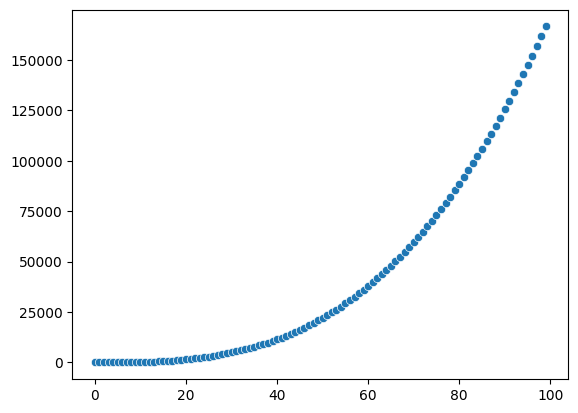

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

memo = {}
def n_days_of_xmas(n):
    if n in memo: return memo[n]
    memo[n] = sum([(x+1)*x/2 for x in range(1,n+1)])
    return memo[n]

for i in range(100):
    n_days_of_xmas(i)

diffs = {}
# lazy find the differences between each subsequent element, i.e. how many gifts did you get on day n
for k in memo:
    diffs[k] = (k+1)*k/2 
print(diffs)

sp = sns.scatterplot(memo)
plt.show()

In [12]:

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [6]:
x,y = [], []
for k in memo:
    x.append(k)
    y.append(memo[k])

In [9]:
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 1.0, 4.0, 10.0, 20.0, 35.0, 56.0, 84.0, 120.0, 165.0, 220.0, 286.0, 364.0, 455.0, 560.0, 680.0, 816.0, 969.0, 1140.0, 1330.0, 1540.0, 1771.0, 2024.0, 2300.0, 2600.0, 2925.0, 3276.0, 3654.0, 4060.0, 4495.0, 4960.0, 5456.0, 5984.0, 6545.0, 7140.0, 7770.0, 8436.0, 9139.0, 9880.0, 10660.0, 11480.0, 12341.0, 13244.0, 14190.0, 15180.0, 16215.0, 17296.0, 18424.0, 19600.0, 20825.0, 22100.0, 23426.0, 24804.0, 26235.0, 27720.0, 29260.0, 30856.0, 32509.0, 34220.0, 35990.0, 37820.0, 39711.0, 41664.0, 43680.0, 45760.0, 47905.0, 50116.0, 52394.0, 54740.0, 57155.0, 59640.0, 62196.0, 64824.0, 67525.0, 70300.0, 731

In [13]:
model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1e-3))
model.fit(np.array(x).reshape(-1,1),y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.001))])

In [14]:
sns.scatterplot(x = x, y = model.transform(np.array(x).reshape(-1,1)))

AttributeError: This 'Pipeline' has no attribute 'transform'